In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
import os

def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())
print(root)

c:\Users\fitsl\Documents\Programming\UVM Programming Classes\PoCS\pocs_project


In [3]:
#load the csv into a dataframe and check it looks good 
df_genres = pd.read_csv(f"{root}/Data/liteweight/genre_counts_by_trope.csv")
df_genres.head()

,Unnamed: 0,trope,length,Romance,Comedy,Action,Adventure,Horror,Thriller,Crime,...,Mystery,War,Science Fiction,TV Movie,Fantasy,Music,Family,Documentary,Western,Animation
0,0,ArgentineMedia,4,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,BlackMagic,28,2,6,3,4,19,5,0,...,4,0,1,0,12,1,3,0,0,1
2,2,ChekhovsGun,1801,195,601,575,410,346,543,291,...,200,49,315,27,203,45,161,22,42,24
3,3,ChekhovsGunman,509,67,184,151,97,72,150,114,...,67,18,69,9,42,10,36,10,13,8
4,4,DramaticThunder,105,11,36,21,20,32,20,10,...,15,2,17,1,27,3,13,0,0,1


In [4]:
#define the genre cols to look at 
genre_cols = ['Romance', 'Comedy', 'Action', 'Adventure',
       'Horror', 'Thriller', 'Crime', 'Drama', 'History', 'Mystery', 'War',
       'Science Fiction', 'TV Movie', 'Fantasy', 'Music', 'Family',
       'Documentary', 'Western', 'Animation']


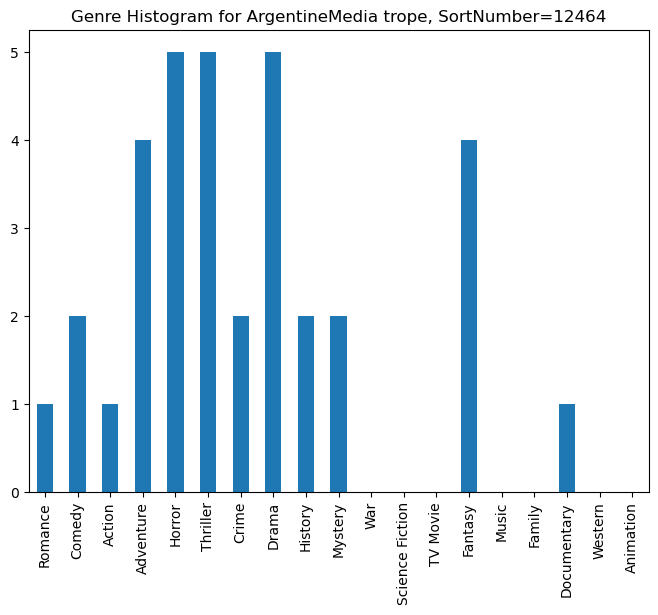

In [ ]:
#define a function to make a histogram for a trope
def genre_trope_hist(data, trope, genres=genre_cols):
    """
    Makes and saves a genre histogram.

    To subselect just some genres, input a list to the genres parameter.

    Note that the trope parameter can function by name and by pseudo-ranked order. 
    
    Pseudo-ranked means that if two tropes have the same number of movies associated with them then we just pick whichever pandas sorted we selected (ties are broken by pandas logic)
    """
    
    df = data.sort_values(by='length', ascending=False).copy()
    if isinstance(trope, str):
        trope_data = df[df['trope'] == trope]
        rank = trope_data.index[0] + 1
    elif isinstance(trope, int):
        rank = trope
        trope = df['trope'].iloc[rank-1]


    plt.figure(figsize=(8, 6))
    genre_data = df.loc[rank - 1, genre_cols]
    genre_data.plot(kind='bar')

    plt.title(f"Genre Histogram for {trope} trope, SortNumber={rank}")
    plt.savefig(f"{root}/Figures/Genre Histograms/Just_Counts/GenreHistogramFor_{trope}_.png")
    plt.show()

genre_trope_hist(df_genres, 'ArgentineMedia')